In [1738]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras import Model

## Preprocessing

### User Data Normalization

In [1739]:
df_decisions_list = []
df_decisions_list.append({'df': pd.read_csv('./amazon_stock_trades.csv'), 'comp': 'AMZN'})
df_decisions_list.append({'df': pd.read_csv('./apple_stock_trades.csv'), 'comp': 'AAPL'})
df_decisions_list.append({'df': pd.read_csv('./cisco_stock_trades.csv'), 'comp': 'CSCO'})
df_decisions_list.append({'df': pd.read_csv('./ibm_stock_trades.csv'), 'comp': 'IBM'})
df_decisions_list.append({'df': pd.read_csv('./jnj_stock_trades.csv'), 'comp': 'JNJ'})
df_decisions_list.append({'df': pd.read_csv('./jnpr_stock_trades.csv'), 'comp': 'JNPR'})
df_decisions_list.append({'df': pd.read_csv('./msft_stock_trades.csv'), 'comp': 'MSFT'})
df_decisions_list.append({'df': pd.read_csv('./orcl_stock_trades.csv'), 'comp': 'ORCL'})
df_decisions_list.append({'df': pd.read_csv('./pfizer_stock_trades.csv'), 'comp': 'PFIZER'})
df_decisions_list.append({'df': pd.read_csv('./tgt_stock_trades.csv'), 'comp': 'TGT'})

In [1740]:
from sklearn.preprocessing import MinMaxScaler
columns_to_exclude = ['Sector of stock', 'Buy/Sell/Keep']
columns_to_normalize = ['Current Value of Stock', 'Expected Value of Stock', 'Error in expected value of stock', 'Percentage of portfolio', 'Percentage of sector', 'Positive', 'Negative', 'Neutral', 'Total', 'Neutral_Pos', 'Neutral_Neg']
scalers_decisions = []
for i in range(len(df_decisions_list)):
    scaler = MinMaxScaler()
    normalized_values = scaler.fit_transform(df_decisions_list[i]['df'][columns_to_normalize])
    normalized_df = pd.DataFrame(normalized_values, columns=columns_to_normalize)
    scalers_decisions.append({'scaler': scaler, 'comp': df_decisions_list[i]['comp']})

    # Concatenate the normalized DataFrame with the excluded column
    df_decisions_list[i]['df'] = pd.concat([normalized_df, df_decisions_list[i]['df'][columns_to_exclude]], axis=1)

In [1741]:
scalers_decisions

[{'scaler': MinMaxScaler(), 'comp': 'AMZN'},
 {'scaler': MinMaxScaler(), 'comp': 'AAPL'},
 {'scaler': MinMaxScaler(), 'comp': 'CSCO'},
 {'scaler': MinMaxScaler(), 'comp': 'IBM'},
 {'scaler': MinMaxScaler(), 'comp': 'JNJ'},
 {'scaler': MinMaxScaler(), 'comp': 'JNPR'},
 {'scaler': MinMaxScaler(), 'comp': 'MSFT'},
 {'scaler': MinMaxScaler(), 'comp': 'ORCL'},
 {'scaler': MinMaxScaler(), 'comp': 'PFIZER'},
 {'scaler': MinMaxScaler(), 'comp': 'TGT'}]

### Stock Exchange Data Normalization

In [1742]:
main_df = []
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/AmazonStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'AMZN'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/AAPLStock_sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'AAPL'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/CSCOStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'CSCO'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/IBMStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'IBM'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/JNJStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'JNJ'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/JNPRStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'JNPR'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/MSFTStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'MSFT'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/ORCLStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'ORCL'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/PfizerStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'PFIZER'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/TGTStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'TGT'})

In [1743]:
scalers_stock = []
for i in range(len(main_df)):
    scaler = MinMaxScaler(feature_range=(0, 1))
    main_df[i]['df'][main_df[i]['df'].columns] = scaler.fit_transform(main_df[i]['df'][main_df[i]['df'].columns])
    scalers_stock.append({'scaler': scaler, 'comp': main_df[i]['comp']})

In [1744]:
# creating the diff and exp column
for i in main_df:
    i['df']['diff']=i['df']['high']-i['df']['low']
for i in main_df:
    i['df']['exp']=(i['df']['open']+i['df']['close'])/2

In [1745]:
dataset = []
for i in df_decisions_list:
    dataset.append(i['df'].values)
dataset = np.concatenate(dataset, axis = 0)
print(dataset)

[[0.01690875490077537 0.0 0.0573411800211275 ... 0.2889154068034872 'IT'
  'Keep']
 [0.006545881621444094 0.003842394418416717 0.06051003470650517 ...
  0.4996072102743184 'IT' 'Keep']
 [0.0 0.030124035188243692 0.04640108646446504 ... 0.42908697933553197
  'IT' 'Buy']
 ...
 [0.8417116742833404 0.7736249734550866 0.9428571428571434 ...
  0.37337504235759883 'Consumer Discretionary' 'Keep']
 [0.8201080182800169 0.6982374177107671 0.2527472527472538 ...
  0.5026178016456893 'Consumer Discretionary' 'Sell']
 [0.6875778977980893 0.6704183478445533 0.44395604395604266 ...
  0.3476663784289607 'Consumer Discretionary' 'Keep']]


In [1746]:
df_decisions = pd.DataFrame(dataset, columns=['Current Value of Stock', 'Expected Value of Stock', 'Error in expected value of stock', 'Percentage of portfolio', 'Percentage of sector', 'Positive', 'Negative', 'Neutral', 'Total', 'Neutral_Pos', 'Neutral_Neg', 'Sector of stock','Buy/Sell/Keep'])

In [1747]:
df_decisions.drop('Sector of stock', axis=1, inplace=True)

In [1748]:
one_hot_encoded = pd.get_dummies(df_decisions['Buy/Sell/Keep'], prefix='Buy/Sell/Keep')
one_hot_encoded = one_hot_encoded.astype(int)

In [1749]:
df_decision_one_hot = df_decisions.drop(labels = 'Buy/Sell/Keep', axis=1)
df_decision_one_hot = pd.concat([df_decision_one_hot, one_hot_encoded], axis=1)

In [1750]:
df_decision_one_hot.head()

,Current Value of Stock,Expected Value of Stock,Error in expected value of stock,Percentage of portfolio,Percentage of sector,Positive,Negative,Neutral,Total,Neutral_Pos,Neutral_Neg,Buy/Sell/Keep_Buy,Buy/Sell/Keep_Keep,Buy/Sell/Keep_Sell
0,0.016909,0.0,0.057341,0.747695,0.353394,0.634112,0.393651,0.209993,0.363674,0.354623,0.288915,0,1,0
1,0.006546,0.003842,0.06051,0.875622,0.132926,0.65947,0.618285,0.282692,0.270249,0.399351,0.499607,0,1,0
2,0.0,0.030124,0.046401,0.038742,0.334798,0.612328,0.595365,0.277965,0.318172,0.316199,0.429087,1,0,0
3,0.027272,0.042233,0.108571,0.334854,0.926111,0.890981,0.371262,0.382849,0.149471,0.807705,0.553326,0,0,1
4,0.037013,0.058251,0.039837,0.16537,0.620705,0.575857,0.650335,0.326131,0.332083,0.25187,0.433689,1,0,0


## Implementing K means clustering

In [1751]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=108)
kmeans.fit(df_decision_one_hot)

KMeans(n_clusters=10, random_state=108)

In [1752]:
centroids = kmeans.cluster_centers_

In [1753]:
centroids

array([[ 2.29804061e-01,  2.30671152e-01,  1.29854513e-01,
         4.16998893e-01,  3.97678380e-01,  3.74816378e-01,
         2.26839814e-01,  2.21909891e-01,  6.29109674e-01,
         4.07545066e-01,  1.48913279e-01,  5.55111512e-17,
         1.00000000e+00, -2.22044605e-16],
       [ 6.89566315e-01,  7.71831113e-01,  1.64517789e-01,
         5.01491424e-01,  4.86153538e-01,  4.53477058e-01,
         3.10242948e-01,  2.61681912e-01,  5.24971314e-01,
         3.82245179e-01,  2.30367282e-01,  1.00000000e+00,
         2.22044605e-16, -1.66533454e-16],
       [ 3.02200425e-01,  2.34692727e-01,  1.74494212e-01,
         5.30750788e-01,  4.71397641e-01,  3.71918116e-01,
         3.52789279e-01,  2.50261144e-01,  5.89408044e-01,
         3.66790745e-01,  2.31884259e-01,  5.55111512e-17,
        -1.11022302e-16,  1.00000000e+00],
       [ 3.94986744e-01,  3.88362885e-01,  1.61655681e-01,
         7.91093923e-01,  7.52094064e-01,  3.97351721e-01,
         3.06486119e-01,  2.43440322e-01,  5.

## Getting predictions for next day

In [1754]:
from tensorflow.keras.models import load_model

In [1755]:
main_df = []
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/AmazonStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'AMZN'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/AAPLStock_sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'AAPL'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/CSCOStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'CSCO'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/IBMStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'IBM'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/JNJStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'JNJ'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/JNPRStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'JNPR'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/MSFTStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'MSFT'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/ORCLStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'ORCL'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/PfizerStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'PFIZER'})
main_df.append({'df': pd.read_csv('./Combining Stock and Twitter Data/MyDrive/TGTStock_Sentiment_6M.csv').drop(['date','Date','Name'],axis=1), 'comp': 'TGT'})

In [1756]:
scalers_stock = []
for i in range(len(main_df)):
    scaler = MinMaxScaler(feature_range=(0, 1))
    main_df[i]['df'][main_df[i]['df'].columns] = scaler.fit_transform(main_df[i]['df'][main_df[i]['df'].columns])
    scalers_stock.append({'scaler': scaler, 'comp': main_df[i]['comp']})

In [1757]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError
from keras.layers import Dense, LSTM, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.saving import register_keras_serializable
@register_keras_serializable(package="MyLoss")
def MyLoss(y_true, y_pred):
    msle = MeanSquaredLogarithmicError()(y_true[:,0], y_pred[:,0])
    mse = MeanSquaredError()(y_true[:,1],y_pred[:,1])
    return  msle + mse

@register_keras_serializable(package='MyModel')
class MyModel(Model):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__()
        self.lstm1 = LSTM(units=50, return_sequences=True,
                          input_shape=[None,30,13])
        self.bn1 = BatchNormalization()
        self.dropout1 = Dropout(0.2)

        self.lstm2 = LSTM(units=60, return_sequences=True)
        self.bn2 = BatchNormalization()
        self.dropout2 = Dropout(0.3)

        self.lstm3 = LSTM(units=70, return_sequences=True)
        self.bn3 = BatchNormalization()
        self.dropout3 = Dropout(0.4)

        self.lstm4 = LSTM(units=80)
        self.bn4 = BatchNormalization()
        self.dropout4 = Dropout(0.5)

        self.dense1_1 = Dense(20)
        self.dense2_1 = Dense(1)

        self.dense1_2 = Dense(20)
        self.dense2_2 = Dense(1)
        self.concat = Concatenate(axis=-1)

    def call(self, inputs):
        enc = self.lstm1(inputs)
        enc = self.bn1(enc)
        enc = self.dropout1(enc)

        enc = self.lstm2(enc)
        enc = self.bn2(enc)
        enc = self.dropout2(enc)

        enc = self.lstm3(enc)
        enc = self.bn3(enc)
        enc = self.dropout3(enc)

        enc = self.lstm4(enc)
        enc = self.bn4(enc)
        enc = self.dropout4(enc)

        out1 = self.dense1_1(enc)
        out1 = self.dense2_1(out1)

        out2 = self.dense1_2(enc)
        out2 = self.dense2_2(out2)

        out = self.concat([out1, out2])
        return out

In [1758]:

def makeNextDayVector(filtered_df, todays_date, stock, comp_name):


    filtered_df['diff']=filtered_df['high']-filtered_df['low']
    filtered_df['exp']=(filtered_df['open']+filtered_df['close'])/2


    loaded_model = load_model('model.keras')

    curr_row = filtered_df[filtered_df['Date'] == todays_date]
    curr_row.drop(['date', 'Date', 'Name'], axis=1, inplace=True)
    filtered_df.drop(['date', 'Date', 'Name'], axis=1, inplace=True)
    curr_stock_value = curr_row['open'].iloc[0]

    # find scaler
    scaler = MinMaxScaler()
    for dict in scalers_stock:
        if dict['comp'] == comp_name:
            scaler = dict['scaler']
            break

    filtered_df[filtered_df.columns] = scaler.fit_transform(filtered_df[filtered_df.columns])

    predicted_values = pd.DataFrame()

    predicted_values[['open', 'high', 'low', 'volume', 'close', 'Positve', 'Negative','Neutral', 'Total', 'NeutralPos', 'NeutralNeg']] = 0

    predicted_values[['diff', 'exp']] = loaded_model.predict(np.array([filtered_df.values]).astype(float))

    # predicted_values=scaler.inverse_transform(predicted_values)
    print(predicted_values.columns)

    predicted_values[predicted_values.columns] = scaler.inverse_transform(predicted_values)



    predicted_values.drop(['open', 'high', 'low', 'volume', 'close', 'Positve', 'Negative','Neutral', 'Total', 'NeutralPos', 'NeutralNeg'], axis=1, inplace=True)


    expected_value = predicted_values['exp'].iloc[0]
    error = predicted_values['diff'].iloc[0]

    percen_portfolio = stock['Percentage of portfolio']
    percen_sector = stock['Percentage of sector']
    sector = stock['Sector of Stock']

    positives = curr_row['Positve'].iloc[0]
    negatives = curr_row['Negative'].iloc[0]
    total = curr_row['Total'].iloc[0]
    neutral = curr_row['Neutral'].iloc[0]
    neutral_pos = curr_row['NeutralPos'].iloc[0]
    neutral_neg = curr_row['NeutralNeg'].iloc[0]



    stock_vect = []
    stock_vect.append(curr_stock_value)
    stock_vect.append(expected_value)
    stock_vect.append(error)
    stock_vect.append(percen_portfolio)
    stock_vect.append(percen_sector)
    stock_vect.append(positives)
    stock_vect.append(negatives)
    stock_vect.append(total)
    stock_vect.append(neutral)
    stock_vect.append(neutral_pos)
    stock_vect.append(neutral_neg)

    # add posi negi from filtered data in stock vector

    # stock_vect.append(sector)


    return stock_vect


### User input vector

In [1759]:
input = []

todays_date = '1/8/2018'
list_of_stocks = []
list_of_stocks.append({'Percentage of portfolio': 0.5, 'Percentage of sector': 15.56, 'Sector of Stock': 'IT', 'comp': 'AMZN'});
list_of_stocks.append({'Percentage of portfolio': 4.5, 'Percentage of sector': 7.8, 'Sector of Stock': 'IT', 'comp': 'MSFT'});
list_of_stocks.append({'Percentage of portfolio': 7.5, 'Percentage of sector': 18.26, 'Sector of Stock': 'Health', 'comp': 'AAPL'});
list_of_stocks.append({'Percentage of portfolio': 16.5, 'Percentage of sector': 10.26, 'Sector of Stock': 'Health', 'comp': 'PFIZER'});
list_of_stocks

[{'Percentage of portfolio': 0.5,
  'Percentage of sector': 15.56,
  'Sector of Stock': 'IT',
  'comp': 'AMZN'},
 {'Percentage of portfolio': 4.5,
  'Percentage of sector': 7.8,
  'Sector of Stock': 'IT',
  'comp': 'MSFT'},
 {'Percentage of portfolio': 7.5,
  'Percentage of sector': 18.26,
  'Sector of Stock': 'Health',
  'comp': 'AAPL'},
 {'Percentage of portfolio': 16.5,
  'Percentage of sector': 10.26,
  'Sector of Stock': 'Health',
  'comp': 'PFIZER'}]

In [1760]:
next_vectors = []
for i in range(len(list_of_stocks)):
    if(list_of_stocks[i]['comp'] == 'AMZN'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/AmazonStock_Sentiment_6M.csv');
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'AMZN'), 'comp': 'AMZN'})
    elif(list_of_stocks[i]['comp'] == 'AAPL'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/AAPLStock_sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'AAPL'), 'comp': 'AAPL'})
    elif(list_of_stocks[i]['comp'] == 'MSFT'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/MSFTStock_Sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'MSFT'), 'comp': 'MSFT'})
    elif(list_of_stocks[i]['comp'] == 'PFIZER'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/PfizerStock_Sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'PFIZER'), 'comp': 'PFIZER'})
    elif(list_of_stocks[i]['comp'] == 'CSCO'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/CSCOStock_Sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'CSCO'), 'comp': 'CSCO'})
    elif(list_of_stocks[i]['comp'] == 'IBM'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/IBMStock_Sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'IBM'), 'comp': 'IBM'})
    elif(list_of_stocks[i]['comp'] == 'JNJ'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/JNJStock_Sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'JNJ'), 'comp': 'JNJ'})
    elif(list_of_stocks[i]['comp'] == 'JNPR'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/JNPRStock_Sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'JNPR'), 'comp': 'JNPR'})
    elif(list_of_stocks[i]['comp'] == 'ORCL'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/ORCLStock_Sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'ORCL'), 'comp': 'ORCL'})
    elif(list_of_stocks[i]['comp'] == 'TGT'):
        df = pd.read_csv('./Combining Stock and Twitter Data/MyDrive/TGTStock_Sentiment_6M.csv')
        filtered_df = df[df['Date'].replace('/', '') <= todays_date.replace('/', '')].tail(30)
        next_vectors.append({'next_day_vector': makeNextDayVector(filtered_df, todays_date, list_of_stocks[i], 'TGT'), 'comp': 'TGT'})


/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipykernel_4330/2993926521.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_row.drop(['date', 'Date', 'Name'], axis=1, inplace=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Index(['open', 'high', 'low', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'diff', 'exp'],
      dtype='object')


/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipykernel_4330/2993926521.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_row.drop(['date', 'Date', 'Name'], axis=1, inplace=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step
Index(['open', 'high', 'low', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'diff', 'exp'],
      dtype='object')


/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipykernel_4330/2993926521.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_row.drop(['date', 'Date', 'Name'], axis=1, inplace=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
Index(['open', 'high', 'low', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'diff', 'exp'],
      dtype='object')


/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipykernel_4330/2993926521.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_row.drop(['date', 'Date', 'Name'], axis=1, inplace=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
Index(['open', 'high', 'low', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'diff', 'exp'],
      dtype='object')


In [1761]:
next_vectors

[{'next_day_vector': [1236.0,
   1395.839195690751,
   25.248018814325256,
   0.5,
   15.56,
   43.75523889,
   6.370494552,
   1193,
   49.87426655,
   43.75523889,
   18.5131766],
  'comp': 'AMZN'},
 {'next_day_vector': [88.2,
   93.4781572419405,
   1.5348345750689567,
   4.5,
   7.8,
   43.25955734,
   18.5110664,
   497,
   38.22937626,
   43.25955734,
   27.49427691],
  'comp': 'MSFT'},
 {'next_day_vector': [174.35,
   168.18254580177367,
   1.6677195708751704,
   7.5,
   18.26,
   45.12110727,
   10.7266436,
   1445,
   44.15224913,
   45.12110727,
   17.41256408],
  'comp': 'AAPL'},
 {'next_day_vector': [36.72,
   37.734094686508186,
   1.0126724314689688,
   16.5,
   10.26,
   28.08988764,
   6.460674157,
   356,
   65.4494382,
   28.57739951,
   6.460674157],
  'comp': 'PFIZER'}]

### Normalization of Next Day Vector

In [1762]:
for i in next_vectors:
    scaler = MinMaxScaler()
    for dict in scalers_decisions:
        if dict['comp'] == i['comp']:
            scaler = dict['scaler']
            break

    normalized_array = scaler.transform([i['next_day_vector']])
    normalized_list = normalized_array.flatten()
    i['next_day_vector'] = normalized_list

/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [1763]:
df_decision_one_hot

,Current Value of Stock,Expected Value of Stock,Error in expected value of stock,Percentage of portfolio,Percentage of sector,Positive,Negative,Neutral,Total,Neutral_Pos,Neutral_Neg,Buy/Sell/Keep_Buy,Buy/Sell/Keep_Keep,Buy/Sell/Keep_Sell
0,0.016909,0.0,0.057341,0.747695,0.353394,0.634112,0.393651,0.209993,0.363674,0.354623,0.288915,0,1,0
1,0.006546,0.003842,0.06051,0.875622,0.132926,0.65947,0.618285,0.282692,0.270249,0.399351,0.499607,0,1,0
2,0.0,0.030124,0.046401,0.038742,0.334798,0.612328,0.595365,0.277965,0.318172,0.316199,0.429087,1,0,0
3,0.027272,0.042233,0.108571,0.334854,0.926111,0.890981,0.371262,0.382849,0.149471,0.807705,0.553326,0,0,1
4,0.037013,0.058251,0.039837,0.16537,0.620705,0.575857,0.650335,0.326131,0.332083,0.25187,0.433689,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.872455,0.831811,0.389011,0.964227,0.301355,0.606196,0.641853,0.095865,0.326535,0.460702,0.49102,0,0,1
1066,0.79435,0.855808,0.306044,0.986055,0.548348,0.57014,0.452769,0.0,0.446299,0.411324,0.276136,1,0,0
1067,0.841712,0.773625,0.942857,0.456054,0.807529,0.4164,0.683732,0.274436,0.461552,0.200784,0.373375,0,1,0
1068,0.820108,0.698237,0.252747,0.937983,0.322773,0.716076,0.559775,0.772556,0.275992,0.611178,0.502618,0,0,1


## Calculating Distance from Cluster Centroid

In [1764]:
centroid_decision = {}
for i in range(len(centroids)):
	if centroids[i, -3] == max(centroids[i, -3], centroids[i, -2], centroids[i, -1]):
		centroid_decision[i] = "Buy"
	elif centroids[i, -2] == max(centroids[i, -3], centroids[i, -2], centroids[i, -1]):
		centroid_decision[i] = "Keep"
	elif centroids[i, -1] == max(centroids[i, -3], centroids[i, -2], centroids[i, -1]):
		centroid_decision[i] = "Sell"
	else:
		centroid_decision[i] = "Keep"

In [1765]:
centroid_decision

{0: 'Keep',
 1: 'Buy',
 2: 'Sell',
 3: 'Keep',
 4: 'Sell',
 5: 'Buy',
 6: 'Sell',
 7: 'Buy',
 8: 'Keep',
 9: 'Keep'}

In [1766]:
centroids_without_decision = centroids[:,:-3]

In [1767]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(centroids_without_decision)
pca_df = pca.transform(centroids_without_decision)

In [1768]:
next_vector_lst = []
# for i in next_vectors:
# 	next_vector_lst.append(i['next_day_vector'])
next_vector_lst.append(next_vectors[0]['next_day_vector'])
next_vector_df = pd.DataFrame(next_vector_lst, columns=['Current Value of Stock', 'Expected Value of Stock', 'Error in expected value of stock', 'Percentage of portfolio', 'Percentage of sector', 'Positive', 'Negative', 'Neutral', 'Total', 'Neutral_Pos', 'Neutral_Neg'])

In [1769]:
pca_next_vector = pca.transform(next_vector_df)

/home/satvikv/apps/miniconda/miniconda3/envs/rec_proj/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


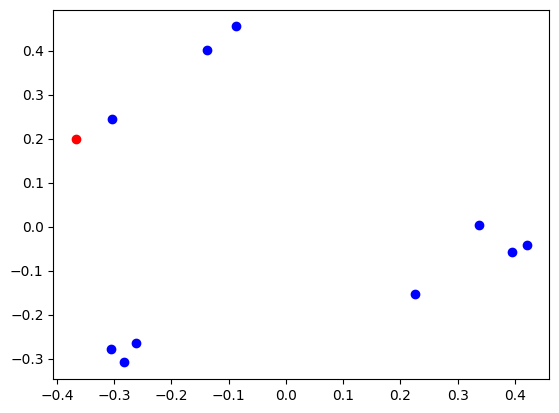

In [1770]:
import matplotlib.pyplot as plt
plt.scatter(pca_df[:, 0], pca_df[:, 1], color='blue')
plt.scatter(pca_next_vector[:, 0], pca_next_vector[:, 1], color='red')
plt.show()


In [1771]:
distance_from_centroid = []
for j in range(len(next_vectors)):
	current_distances = []
	for i in range(centroids_without_decision.shape[0]):
		current_distances.append(np.linalg.norm(next_vectors[j]['next_day_vector'] - centroids_without_decision[i]))
	distance_from_centroid.append(current_distances)


In [1772]:
distance_from_centroid

[[1.0224343577988908,
  0.8002561101122951,
  1.0170127333501993,
  1.0789053222385216,
  0.8199402111289532,
  0.6788999463562865,
  0.7651604132688716,
  1.029716871147987,
  0.8237890692744543,
  0.7875953656869792],
 [1.5556288888679808,
  1.1917284506743058,
  1.4160551760144684,
  1.3967202950283337,
  1.2470074319753643,
  1.0382417951924776,
  0.9927128879358923,
  1.4927851600210833,
  1.1885957284776656,
  1.0022809935716464],
 [1.5212610818132384,
  1.2302722653158134,
  1.3617884543654397,
  1.0296338854357714,
  1.210188288869231,
  1.2390916851168834,
  1.233468094877091,
  1.3934669126436898,
  1.223379502200702,
  1.2735437008749289],
 [3.3405652253703453,
  3.195006750910928,
  3.2099575775662696,
  2.957357824787641,
  3.2188270166843886,
  3.2520498435348246,
  3.1895037327108047,
  3.2150338735543578,
  3.1813190161251934,
  3.2577977609582467]]

In [1773]:
results = {}

for i in range(len(distance_from_centroid)):
    min_index = 0
    for j in range(len(distance_from_centroid[i])):
        if(distance_from_centroid[i][j] < distance_from_centroid[i][min_index]):
            min_index = j

    centroid = centroid_decision[min_index]
    if centroid not in results:
        results[centroid] = []  # Initialize empty list if centroid not in results
    results[centroid].append(next_vectors[i]['comp'])


In [1774]:
results

{'Buy': ['AMZN'], 'Sell': ['MSFT'], 'Keep': ['AAPL', 'PFIZER']}